Try to get Prot ages with just Rvar, second part is if I want to recalculate ages with a different bin size to generate file "minchisq.pkl"

In [67]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

In [148]:
df_bin_MS=pd.read_pickle('minchisq.pkl')

df_bin_MS_rvar=pd.read_pickle('minchisq_rvar.pkl')

print(len(df_bin_MS),len(df_bin_MS_rvar))

20714 84824


In [11]:
df_bin_MS=df_bin_MS.dropna(subset=['Rvar','abs_G','logg_y','teff_calc','kin_age','kin_age_err'])
regr, regr_outs = Astraea.RFregressor(df_bin_MS, ['Rvar','abs_G','logg_y','teff_calc'],
                                      target_var='kin_age', target_var_err='kin_age_err', n_estimators=100)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 4
Features attempt to train: ['Rvar', 'abs_G', 'logg_y', 'teff_calc']
18915 stars in dataframe!
18915 total stars used for RF!
15132 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.11357227532302056
Average chi^2 is: 19935401889947.035
Finished!


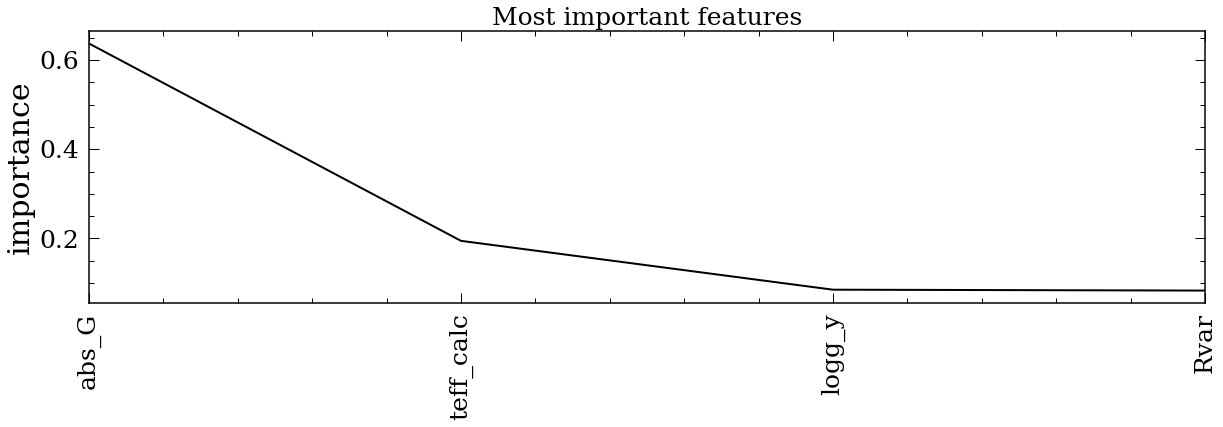

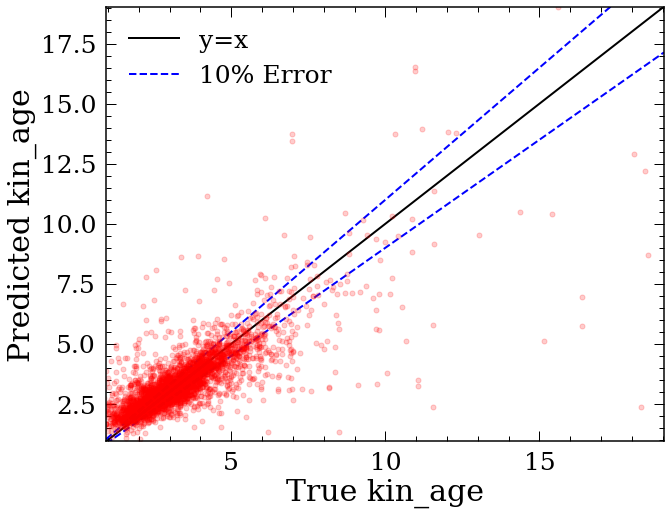

In [12]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='kin_age', MS=10)


In [14]:
regr_outs['actrualF']

['Rvar', 'teff_calc', 'logg_y', 'abs_G']

In [16]:
df_bin_MS_rvar['kin_age_predict']=regr.predict(df_bin_MS_rvar[['Rvar', 'teff_calc', 'logg', 'abs_G']])


(0, 10)

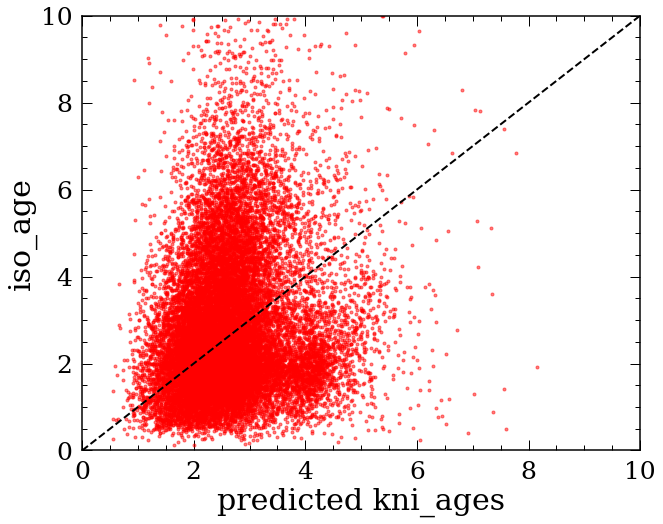

In [21]:
df_bin_MS_rvar_plot=df_bin_MS_rvar.loc[df_bin_MS_rvar['iso_age']<10]
df_bin_MS_rvar_plot=df_bin_MS_rvar_plot.loc[df_bin_MS_rvar_plot['iso_age_err1']<3]

plt.figure(figsize=(10,8))
plt.plot(df_bin_MS_rvar_plot['kin_age_predict'],df_bin_MS_rvar_plot['iso_age'],'r.',alpha=0.5)
plt.plot([0,10],[0,10],'k--')
plt.xlabel('predicted kni_ages')
plt.ylabel('iso_age')
plt.xlim([0,10])
plt.ylim([0,10])



In [24]:
df_bin_MS_rvar.loc[df_bin_MS_rvar['KID']==12456401]

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,age,Rvar,teff_calc,Rvar_log,logg,v_b,abs_G,iso_age_err,kin_age,kin_age_predict
84040,12456401,0.526,0.012,-0.013,3809.6,81.2,-71.5,4.704,0.012,-0.012,...,4.385001,4237.663746,3679.311078,3.627126,4.826,7.88599,8.63656,9.347304,0.854706,3.022529


In [23]:
df_bin_MS_rvar.loc[df_bin_MS_rvar['KID']==11075611]

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,age,Rvar,teff_calc,Rvar_log,logg,v_b,abs_G,iso_age_err,kin_age,kin_age_predict
73535,11075611,0.539,0.013,-0.013,3761.3,77.3,-77.3,4.686,0.013,-0.013,...,4.530539,4689.908028,3504.631839,3.671164,4.917,-9.770699,8.817705,9.117511,1.042864,4.650876


# plot against AGOGEE abundances

In [149]:
APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')

#df_bin_MS=pd.merge(df_bin_MS_rvar,df_rvar_s[['KID','source_id']],left_on='KID',right_on='KID',how='inner')


In [150]:
cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

['C_FE',
 'CI_FE',
 'N_FE',
 'O_FE',
 'NA_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE',
 'CU_FE',
 'GE_FE',
 'RB_FE',
 'CE_FE',
 'ND_FE',
 'YB_FE']

In [151]:
df_bin_MS=pd.merge(APOGEE,df_bin_MS_rvar,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_bin_MS=df_bin_MS.loc[df_bin_MS['FE_H']>-5000]

abund=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','SC_FE','TI_FE',
      'V_FE','CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','ZN_FE','SR_FE','Y_FE','ZR_FE',
      'BA_FE','LA_FE','CE_FE','PR_FE','ND_FE','SM_FE','EU_FE','GD_FE','DY_FE']

-0.05329638347029686


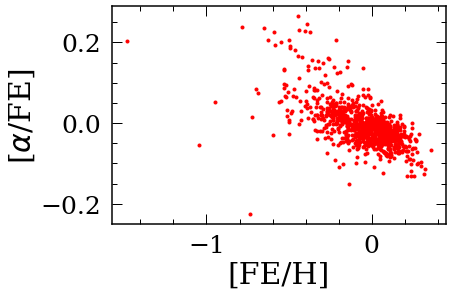

In [152]:
# alpha/Fe
plt.plot(figsize=(10,8))
plt.plot(df_bin_MS['FE_H'],df_bin_MS['ALPHA_M'],'r.')
plt.ylabel('[$\\alpha$/FE]')
plt.xlabel('[FE/H]')
print(np.mean(df_bin_MS['FE_H']))

# Solar twins

In [153]:

df_st=df_bin_MS.loc[abs(df_bin_MS['FE_H'])<=0.1]


In [154]:
df_st.to_pickle('Figures/solartwins_rvar.pkl')

In [78]:
#df_st=pd.read_pickle('Figures/solartwins.pkl')

df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]
print(len(df_st))
df_ka=pd.read_table('BedellAbund.csv',delimiter=',')
df_ka.HIP=[int(i) for i in df_ka.HIP.values]
df_ka_age=pd.read_table('Bedell_age.csv',delimiter=',')
df_ka_age.HIP=[int(i) for i in df_ka_age.HIP.values]
df_fe=pd.read_table('Bedell_Fe.csv',delimiter=',')
df_fe.HIP=[int(i) for i in df_fe.HIP.values]

42


In [79]:
df_st_md=pd.merge(df_ka,df_ka_age,left_on='HIP',right_on='HIP',how='inner')
df_st_md=pd.merge(df_st_md,df_fe,left_on='HIP',right_on='HIP',how='inner')
df_st_md.columns

Index(['HIP', '[CI/H]', '[CH/H]', '[OI/H]', '[NaI/H]', '[MgI/H]', '[AlI/H]',
       '[SiI/H]', '[SI/H]', '[CaI/H]', '[ScI/H]', '[ScII/H]', '[TiI/H]',
       '[TiII/H]', '[VI/H]', '[CrI/H]', '[CrII/H]', '[MnI/H]', '[CoI/H]',
       '[NiI/H]', '[CuI/H]', '[ZnI/H]', '_RA', '_DE', 'recno', 'e_[ZnI/H]',
       'e_[VI/H]', 'e_[TiII/H]', 'e_[SiI/H]', 'e_[TiI/H]', 'e_[SI/H]',
       'e_[ScII/H]', 'e_[ScI/H]', 'e_[OI/H]', 'e_[NiI/H]', 'e_[NaI/H]',
       'e_[MnI/H]', 'e_[MgI/H]', 'e_[CuI/H]', 'e_[AlI/H]', 'e_[CaI/H]',
       'e_[CH/H]', 'e_[CI/H]', 'e_[CoI/H]', 'e_[CrI/H]', 'e_[CrII/H]',
       'RAJ2000_x', 'DEJ2000_x', 'Agemp', 'AgeLL1s', 'AgeUL1s', 'AgeLL2s',
       'AgeUL2s', 'Agemean', 'Agestd', 'Massmp', 'MassLL1s', 'MassUL1s',
       'MassLL2s', 'MassUL2s', 'MassMean', 'MassStd', 'RAJ2000_y', 'DEJ2000_y',
       'SNR', 'Teff', 'e_Teff', 'logg', 'e_logg', '[Fe/H]', 'e_[Fe/H]', 'Xi',
       'e_Xi'],
      dtype='object')

In [80]:
abun_apog=['C_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','TI_FE','CR_FE','MN_FE','CO_FE',
       'NI_FE','CU_FE']

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/'}

Progress: [##################--] 91.7%


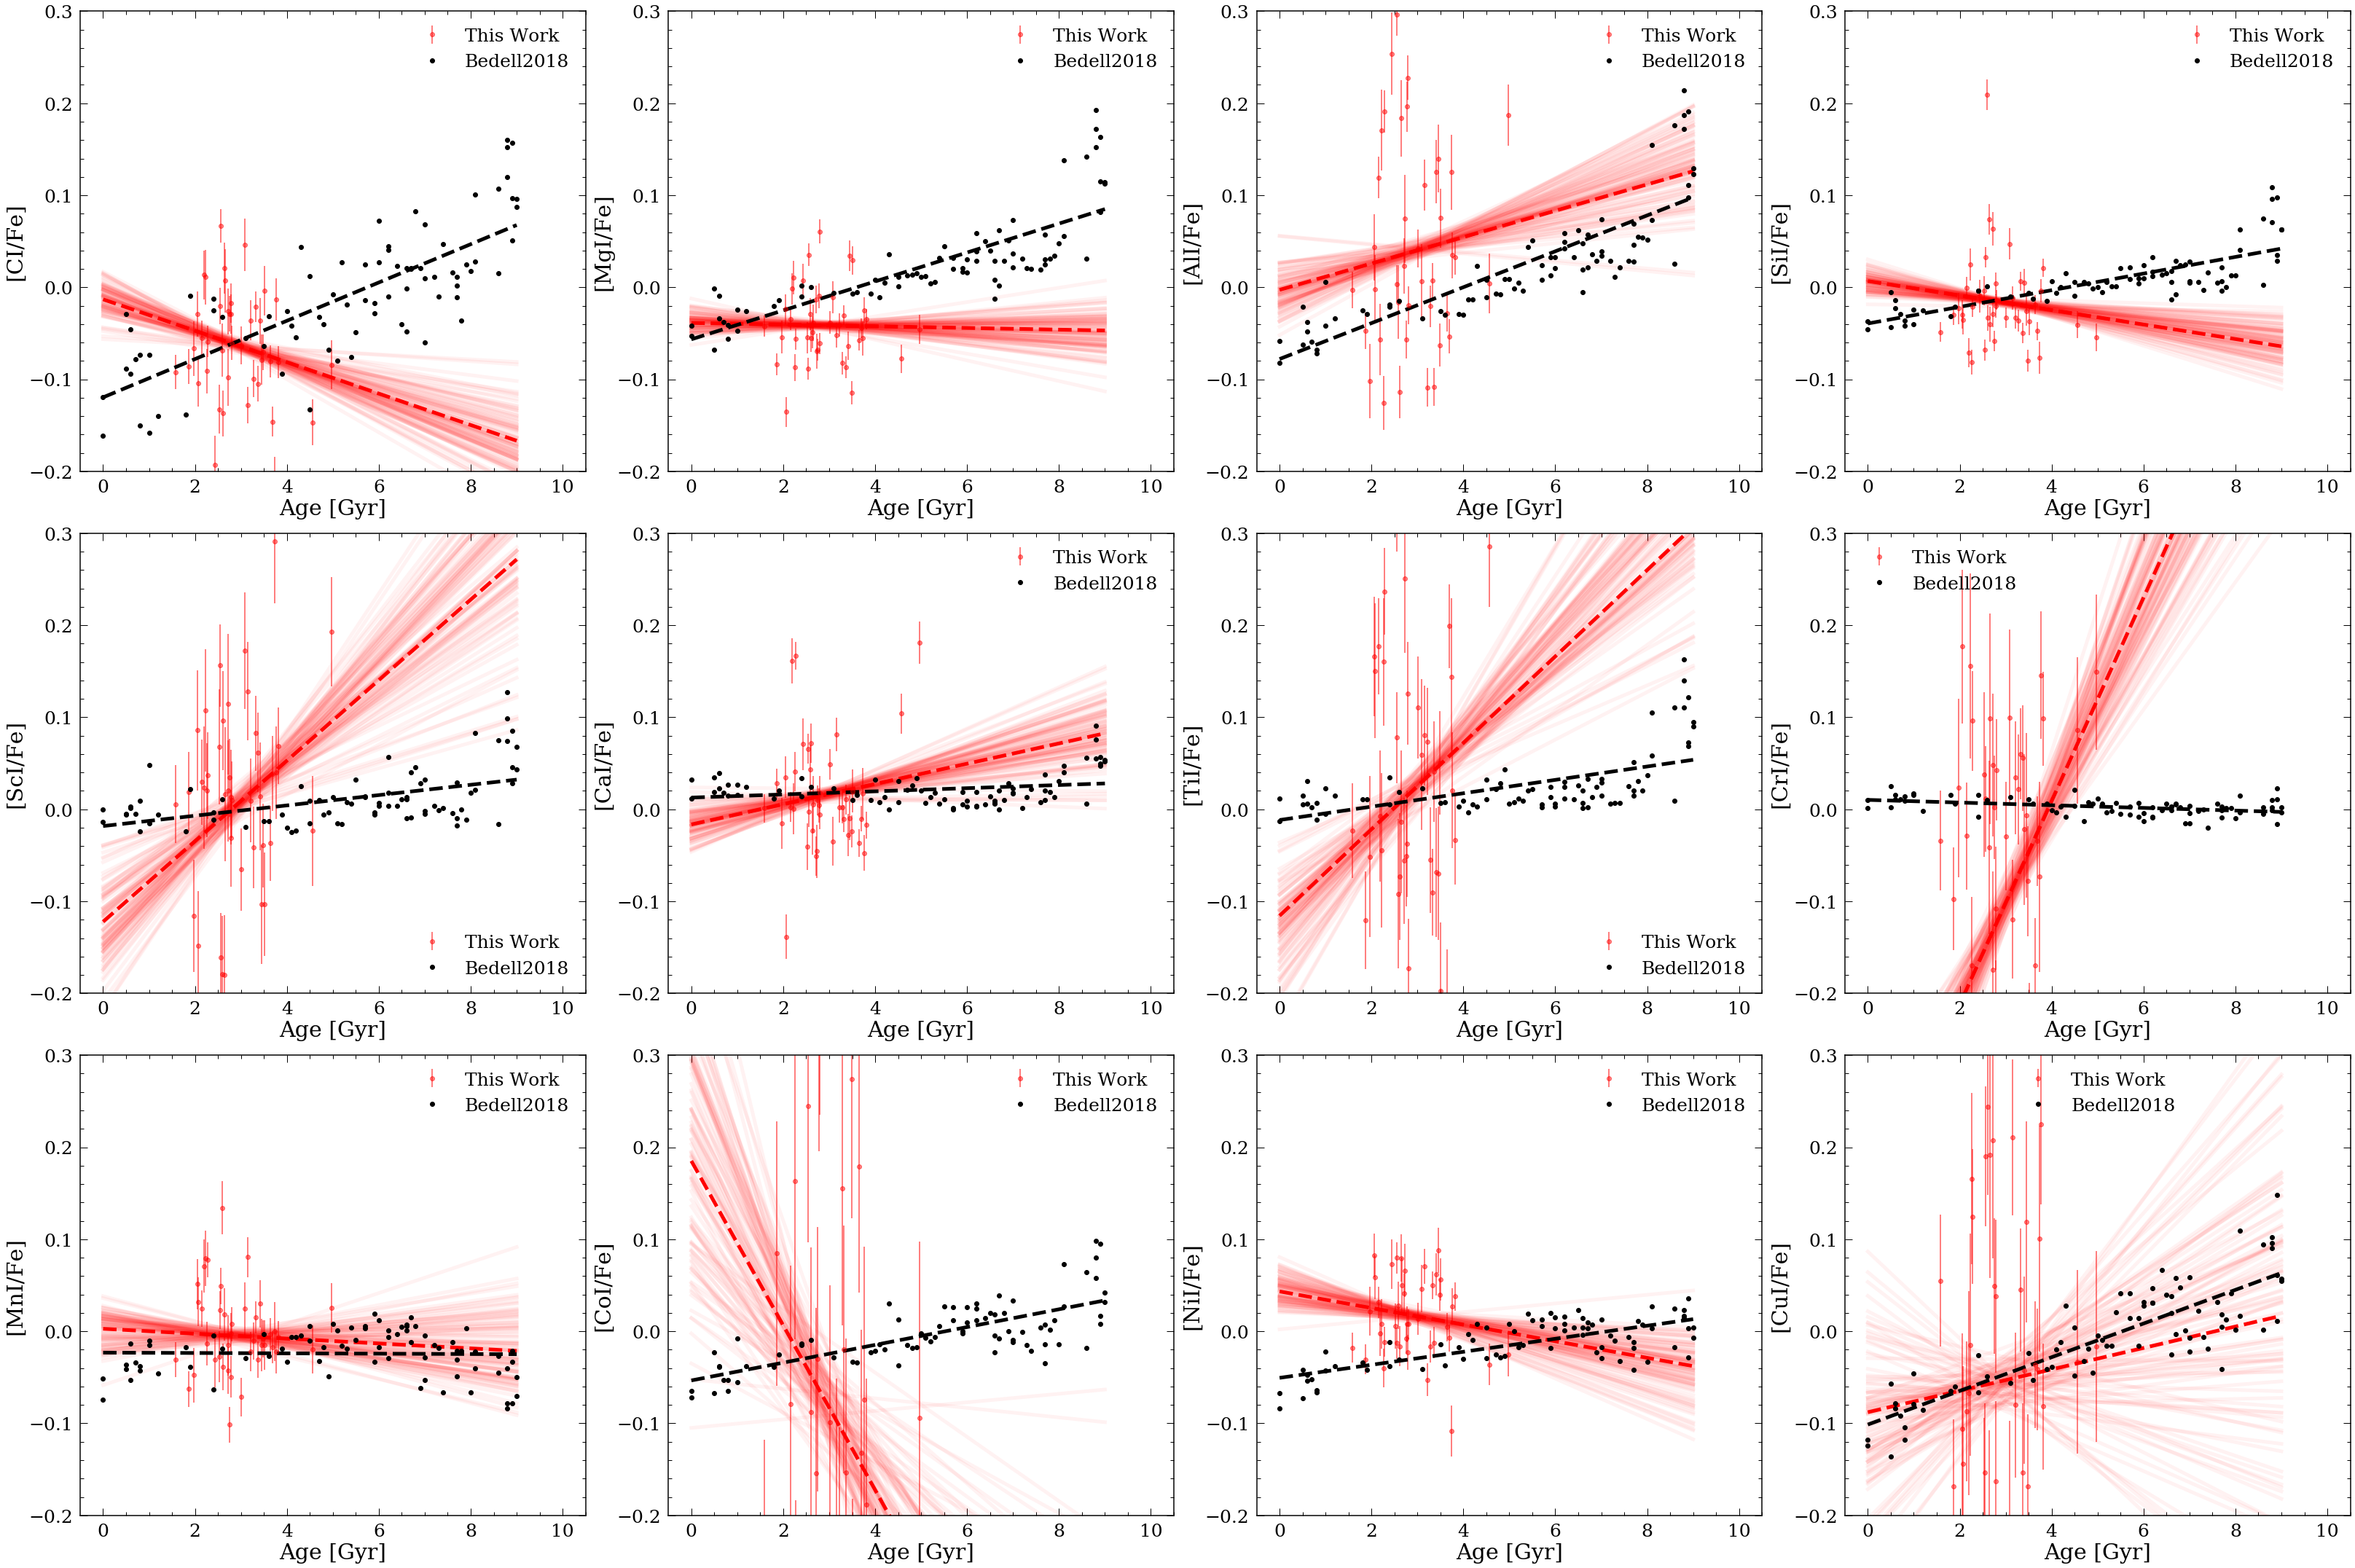

In [81]:
age_name='kin_age_predict'
plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    update_progress(i/len(abun_apog))
    df_plot=df_st.loc[df_st[abun_apog[i]]>-100]
    df_plot=df_plot.reset_index(drop=True)
    plt.subplot(3,4,i+1)
    
    #err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)+np.power(df_plot["age_STD_err"],2.)
    err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)
    
    
    plt.errorbar(df_plot[age_name],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],
                 fmt='ro',label='This Work',alpha=0.5)
    """
    plt.errorbar(df_plot['age_MAD'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],fmt='ro',label='This Work',alpha=0.5)
    """
    
    z = np.polyfit(df_plot[age_name],df_plot[abun_apog[i]],1)
    p = np.poly1d(z)
    plt.plot(range(10),p(range(10)),'r--',linewidth=5)
        
    for k in range(100):
        new_abun_mock=np.array([np.random.normal(df_plot.iloc[j][abun_apog[i]], 
                        df_plot.iloc[j][abun_apog[i]+"_ERR"]) for j in range(len(df_plot))])
        z = np.polyfit(df_plot[age_name],new_abun_mock,1)
        p = np.poly1d(z)
        plt.plot(range(10),p(range(10)),'r-',linewidth=5,alpha=0.05)
    
    z = np.polyfit(df_st_md['Agemp'], df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],1)
    p = np.poly1d(z)
    
    plt.errorbar(df_st_md['Agemp'],df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],
                 fmt='ko',label='Bedell2018')
    plt.plot(range(10),p(range(10)),'k--',linewidth=5)
    
    
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()
#plt.savefig('Abundances.png')
    
    

# recalculate all ages

In [82]:
df_prot_s=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin.pkl')
df_isoages=pd.read_table('GKSPCPapTable2.txt',delimiter='&')
merg1=['KID','age','Rvar','Prot','teff_calc','Prot_log',
       'logg_y','v_b','w','abs_G','source_id','designation']
df_prot_s=pd.merge(df_isoages,df_prot_s[merg1],left_on='KIC',right_on='KID',how='inner')
df_prot_s=df_prot_s.dropna(subset=['age','iso_age'])
df_prot_s['iso_age_err']=np.sqrt(df_prot_s['iso_age_err1']**2.+df_prot_s['iso_age_err2']**2.)


In [103]:
mpf = 'aviary/data/metal_poor_avr.csv'
mrf = 'aviary/data/metal_rich_avr.csv'
af = 'aviary/data/all_stars_avr.csv'
def get_avr_coefficients():
    """
    Fit the parameters of the AVR using data from Yu & Liu:
    https://arxiv.org/pdf/1712.03965.pdf
    Fit to the relationship between log(sigma_z) and age.
    Returns:
        p_mp (array): coefficients [slope, intercept] for straight line fit to
            metal poor stars.
        p_mr (array): coefficients [slope, intercept] for straight line fit to
            metal rich stars.
        p_a (array): coefficients [slope, intercept] for straight line fit to
            all stars.
    """
    mp = pd.read_csv(mpf)
    mr = pd.read_csv(mrf)
    a = pd.read_csv(af)

    p_mp = np.polyfit(np.log(mp.sigma_z_kms), np.log(mp.Age_Gyr), 1)
    p_mr = np.polyfit(np.log(mr.sigma_z_kms), np.log(mr.Age_Gyr), 1)
    p_a = np.polyfit(np.log(a.sigma_z_kms), np.log(a.Age_Gyr), 1)

    return p_mp, p_mr, p_a

def v_to_age(v, coeffs):
    """
    Convert z velocity dispersion [km/s] to age [Gyr]
    Args:
        v (array): Z Velocity dispersion [km/s].
        coeffs (array): coefficients for straight line fit. [intercept, slope]
    Returns:
        age (array): age in Gyr.
    """
    b, a = coeffs
    logt = np.polyval(coeffs, np.log(v))
    return np.exp(logt)

def genErr(dv, dv_err):
    errorRand=np.random.normal(0, 1, len(dv))
    return dv+dv_err*errorRand

import time
from tqdm import trange
# get average ages
def getAveAges(df,fs,binfs):
    
    fslen=len(fs)
    dflen=len(df)
    
    checkpara=np.zeros(fslen)
    paras=np.zeros((dflen,fslen))
    for i in range(fslen):
        paras[:,i]=df[fs[i]].values
    
    iso_age=df['iso_age'].values
    iso_age_err=df['iso_age_err1'].values
    
    iso_ave=np.zeros(len(df))
    iso_ave_err=np.zeros(len(df))
    
    vels=df['v_b'].values
    kin_age=np.zeros(len(df))
    
    for i in trange(dflen):
        
        mask=np.ones(dflen, dtype=bool)
        
        for j in range(fslen):
            checkpara[j]=paras[i,j]
            mask = mask & (abs(paras[:,j]-checkpara[j])<binfs[j]/2)
            #mask = mask & (paras[:,j]>=checkpara[j]-binfs[j]/2)
            #mask = mask & (paras[:,j]<=checkpara[j]+binfs[j]/2)
        
        iso_age_single=iso_age[mask]
        iso_age_err_single=iso_age_err[mask]
        
        weights=1/np.power(iso_age_err_single,2)
        iso_ave[i]=sum((iso_age_single*weights)/sum(weights))
        iso_ave_err[i]=np.sqrt(sum(iso_age_err_single)**2)
        
        vels_single=vels[mask]
        
        kin_age[i]=1.5*np.median(abs(vels_single-np.median(vels_single)))
        
        
    p_mp, p_mr, p_a = get_avr_coefficients()
    df['kin_age']=v_to_age(kin_age,p_mr)
    df['iso_age_ave']=iso_ave
    df['iso_age_ave_err']=iso_ave_err

import time
from tqdm import trange
# get average ages
def getkinAges(df,fs,binfs):
    
    fslen=len(fs)
    dflen=len(df)
    
    checkpara=np.zeros(fslen)
    paras=np.zeros((dflen,fslen))
    for i in range(fslen):
        paras[:,i]=df[fs[i]].values
    
    vels=df['v_b'].values
    kin_age=np.zeros(len(df))
    
    for i in trange(dflen):
        
        mask=np.ones(dflen, dtype=bool)
        
        for j in range(fslen):
            checkpara[j]=paras[i,j]
            mask = mask & (abs(paras[:,j]-checkpara[j])<binfs[j]/2)
        vels_single=vels[mask]
        
        kin_age[i]=1.5*np.median(abs(vels_single-np.median(vels_single)))
        
        
    p_mp, p_mr, p_a = get_avr_coefficients()
    df['kin_age']=v_to_age(kin_age,p_mr)
    
import time
from tqdm import trange
# get average ages
def getkinAges_err(df,fs,binfs,sampsize=10):
    df=df.dropna(subset=['v_b'])
    bin_low=[i*0.8 for i in binfs]
    bin_hi=[i*1.2 for i in binfs]
    
    bins=np.zeros((len(binfs),sampsize))
    ages=np.zeros((len(df),sampsize))

    for i in range(len(binfs)):
        bins[i,:]=np.linspace(bin_low[i],bin_hi[i],sampsize)
    for i in range(sampsize):
        getkinAges(df,fs,bins[:,i])
        ages[:,i]=df['kin_age']
    getkinAges(df,fs,binfs)
    
    #df['kin_age_err']=[np.std(pd.Series(ages[i,:]).dropna()) for i in range(len(df))] 
    return ages

    

In [124]:

    

ages=getkinAges_err(df_prot_s,['teff_calc','Prot_log','abs_G','logg_y'],
                    [366.6666666666667, 2.0, 0.01,0.5499999999999999],sampsize=50)  



100%|██████████| 20714/20714 [00:10<00:00, 1931.05it/s]
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:675: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
100%|██████████| 20714/20714 [00:12<00:00, 1658.38it/s]


(array([ 2.,  6.,  3.,  7.,  5.,  5., 18.,  1.,  0.,  3.]),
 array([3.38583604, 3.52077245, 3.65570886, 3.79064526, 3.92558167,
        4.06051807, 4.19545448, 4.33039088, 4.46532729, 4.60026369,
        4.7352001 ]),
 <a list of 10 Patch objects>)

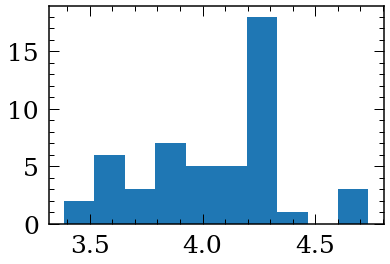

In [128]:
plt.hist(ages[4,:])


In [129]:
df_prot_s['kin_age_err']=[np.std(pd.Series(ages[i,:]).dropna()) for i in range(len(df_prot_s))] 

In [130]:
print(len(df_prot_s),len(df_prot_s.dropna(subset=['kin_age'])),len(df_prot_s.dropna(subset=['kin_age_err'])))

20714 20378 20480


In [131]:
#df_prot_s.to_pickle('minchisq.pkl')


In [133]:
#len(pd.read_pickle('minchisq.pkl').columns)

49

(array([2., 1., 2., 1., 1., 0., 1., 1., 0., 1.]),
 array([1.55942026, 1.63757629, 1.71573232, 1.79388835, 1.87204438,
        1.9502004 , 2.02835643, 2.10651246, 2.18466849, 2.26282452,
        2.34098055]),
 <a list of 10 Patch objects>)

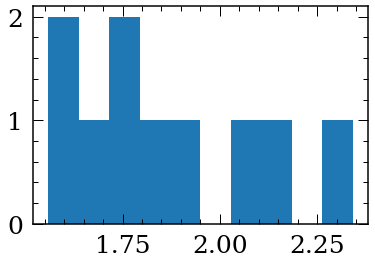

In [123]:
plt.hist(ages[10,:])

In [135]:
df_prot_s.loc[df_prot_s['KID']==11075611]

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,v_b,w,abs_G,source_id,designation,iso_age_err,kin_age,iso_age_ave,iso_age_ave_err,kin_age_err


In [136]:
df_prot_s.loc[df_prot_s['KID']==12456401]

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,v_b,w,abs_G,source_id,designation,iso_age_err,kin_age,iso_age_ave,iso_age_ave_err,kin_age_err
20602,12456401,0.526,0.012,-0.013,3809.6,81.2,-71.5,4.704,0.012,-0.012,...,7.88599,0.5262,8.63656,2.133254e+18,Gaia DR2 2133253566654141952,9.347304,2.858965,10.275395,64.55,0.219394
